In [2482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [2512]:
data = pd.read_csv("data/mushrooms.csv")

In [2484]:
data.shape

(8124, 23)

In [2485]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [2486]:
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [2487]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [2488]:
data['stalk-root'] = data['stalk-root'].apply(lambda x: 'm' if '?' in x else x)

In [2489]:
selected_columns_for_eda = data.loc[:, ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-color', 'stalk-shape', 'stalk-root', 'ring-number', 'population', 'habitat']] 

In [2490]:
custom_palette = ['#FF1493', '#4169E1']

In [2491]:
def count_plot_feature_vs_class(features: list):
    for feature in features:
        plt.figure(figsize=(8, 6))
        count_plot = sns.countplot(x=data[feature], hue='class', data=data, palette=custom_palette)
        
        for plot_container in count_plot.containers:
            count_plot.bar_label(plot_container, label_type='edge', color='black')
        
        plt.title(f'{feature} vs. Mushroom Class', fontsize=14, fontweight='bold', color='green')
        plt.xlabel(feature, fontsize=12, fontweight='bold', color='green')
        plt.ylabel('Count', fontsize=12, fontweight='bold', color='green')
        plt.xticks(rotation=45)
    
        # figure_plot = count_plot.get_figure()
        # figure_plot.savefig(f'{feature}_vs_class.png')
        plt.tight_layout()
        plt.show()
        plt.close()

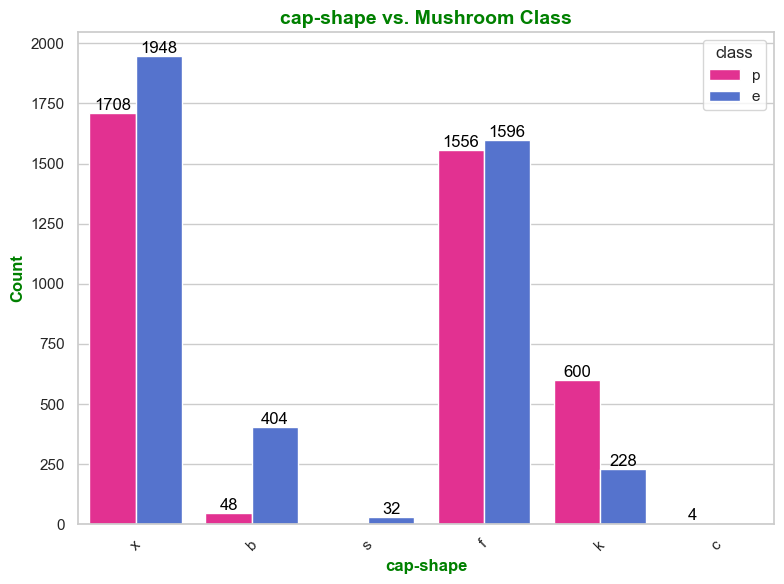

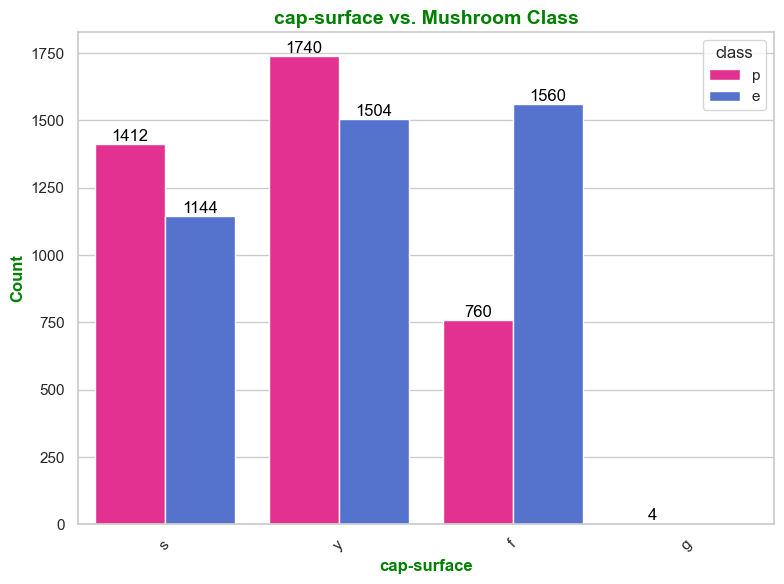

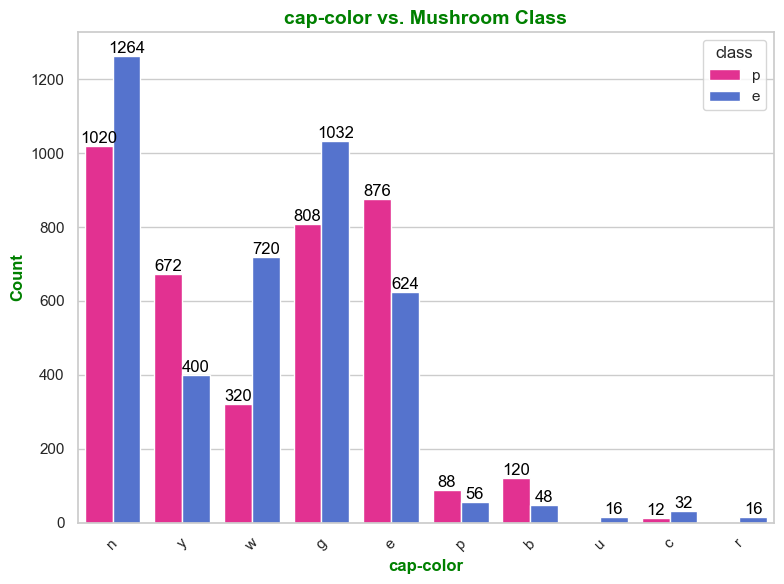

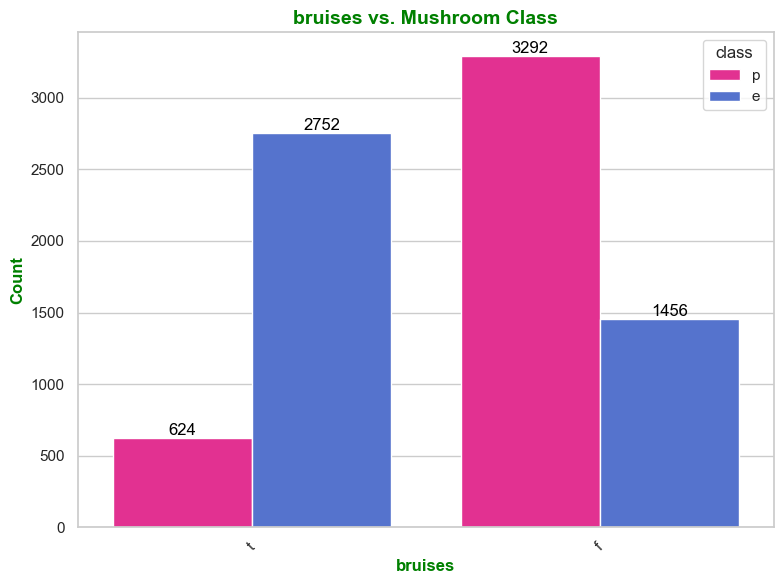

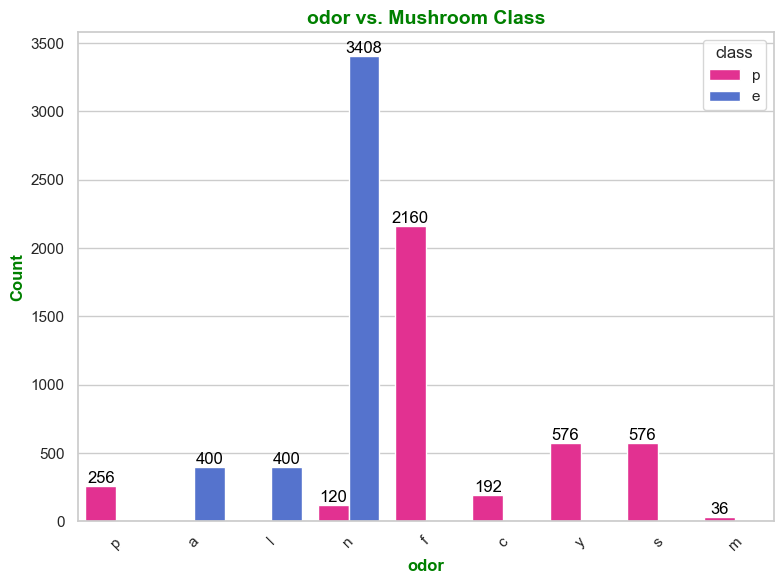

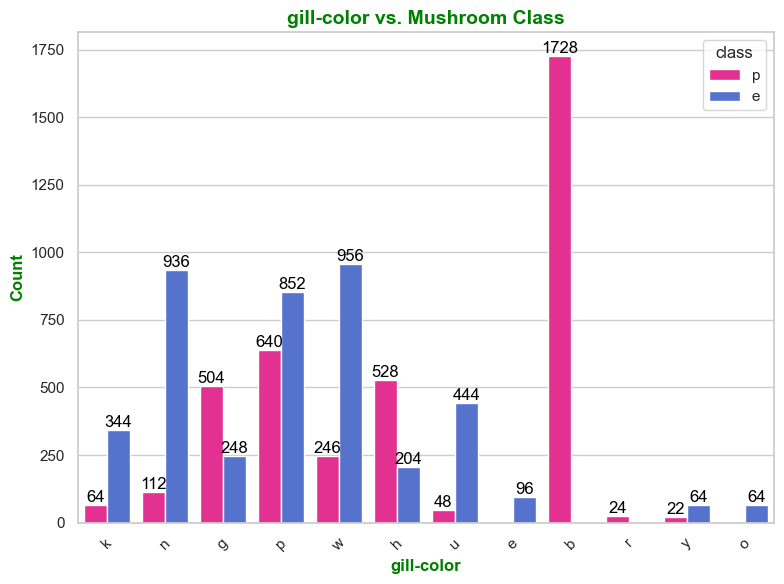

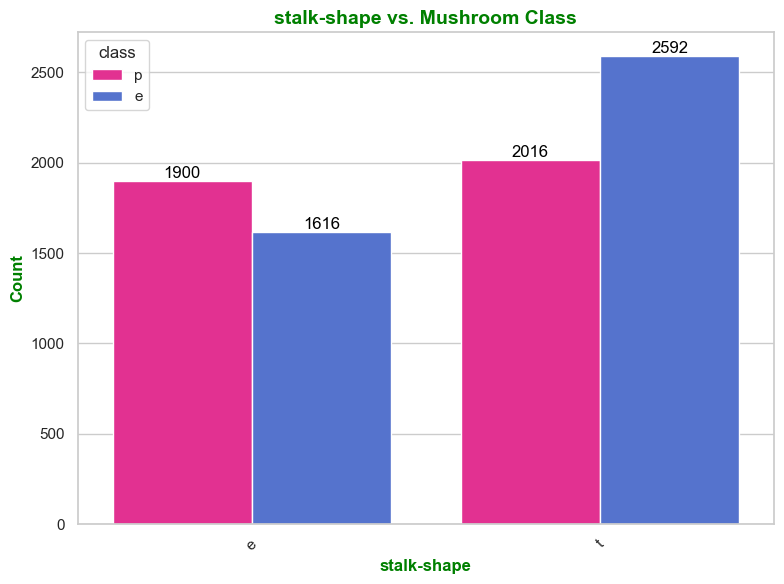

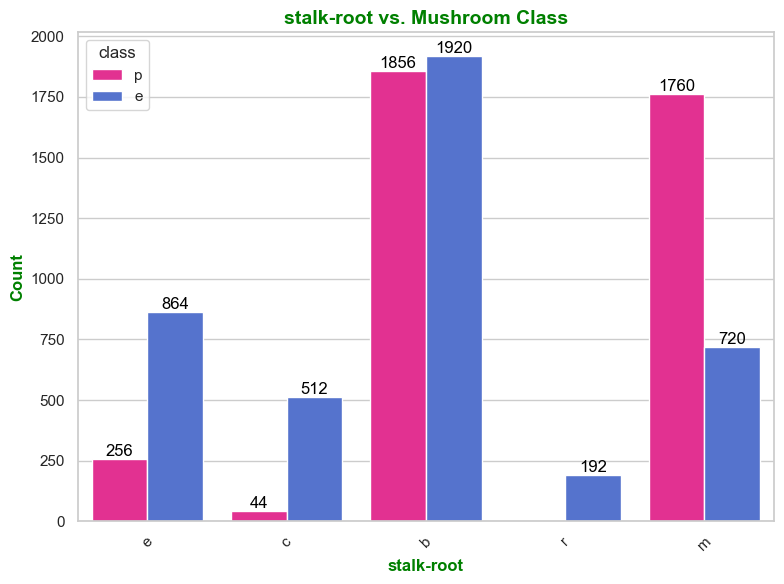

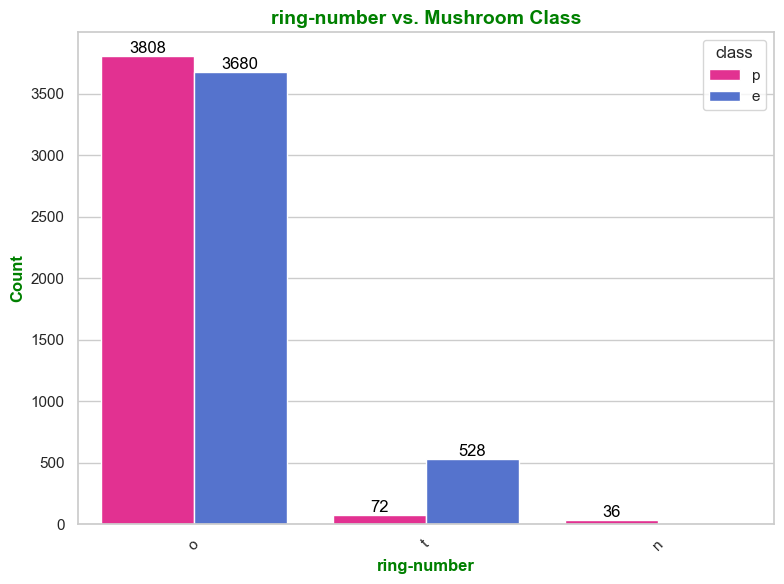

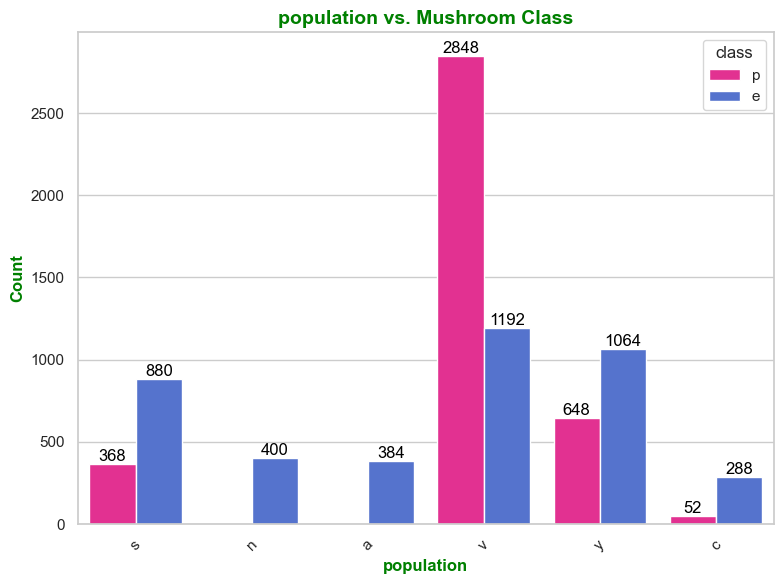

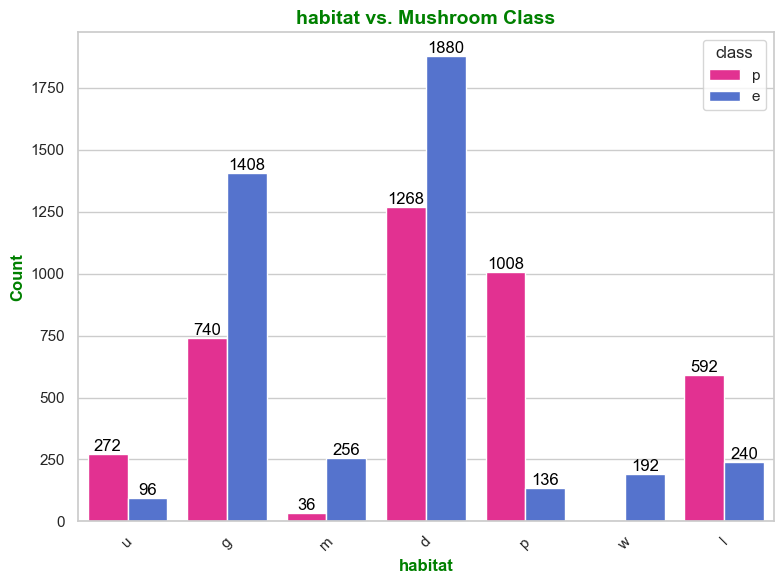

In [2492]:
count_plot_feature_vs_class(features=selected_columns_for_eda)

In [2493]:
def box_plot_feature_vs_class(features: list):
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    
    custom_colors = {'e': '#4169E1', 'p': '#FF1493'}
    
    for column in features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='class', hue='class', y=column, data=data, palette=custom_colors, legend=False)
        plt.title(f"Box Plot of {column} by Class")
        plt.xlabel("Class")
        plt.ylabel(column)
        plt.show()

<Figure size 1000x600 with 0 Axes>

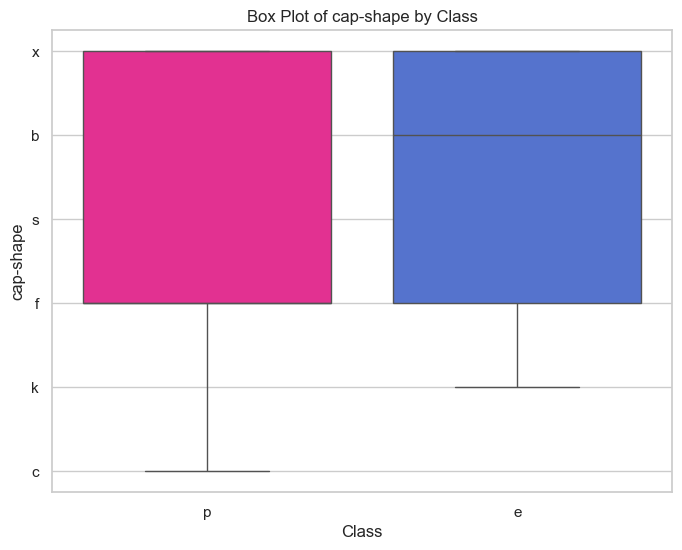

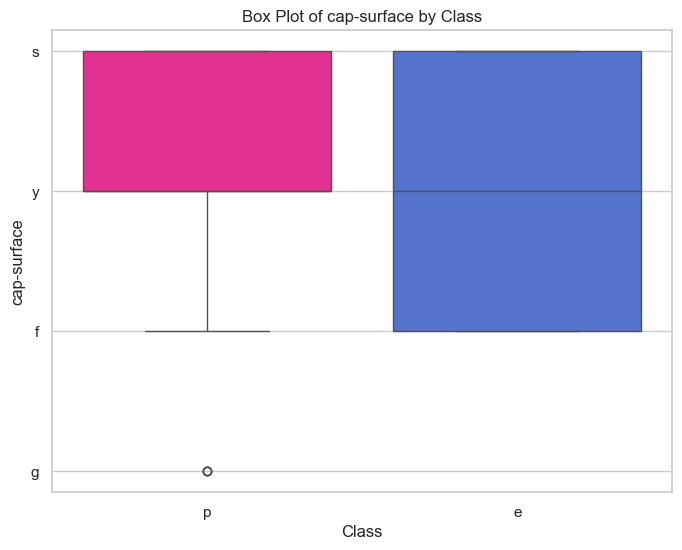

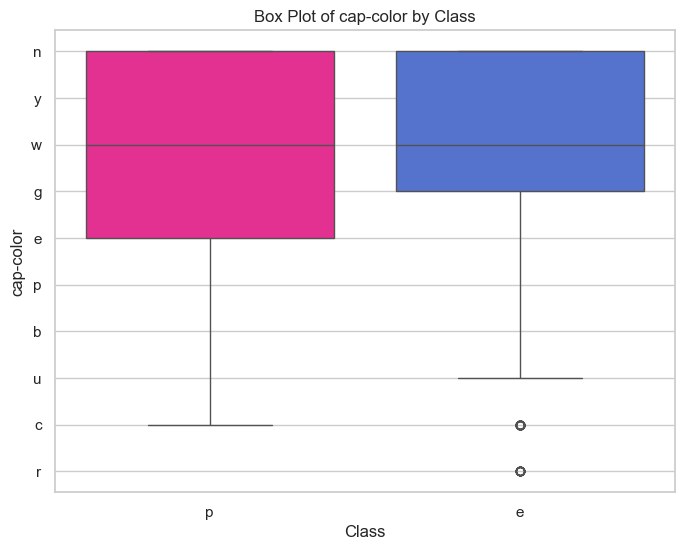

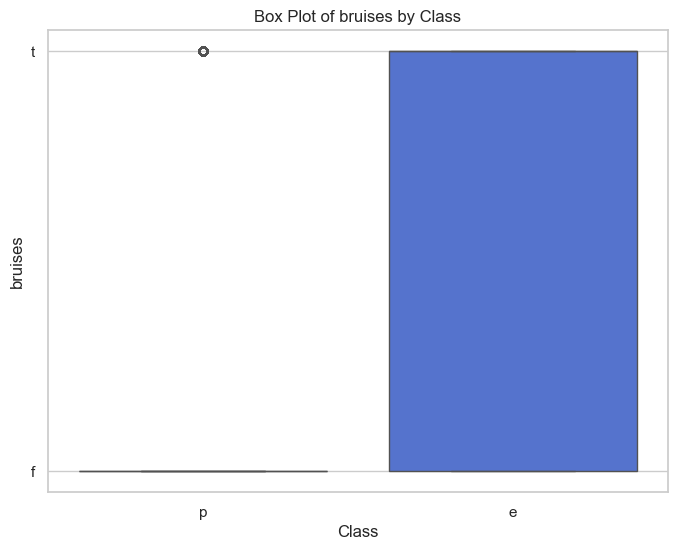

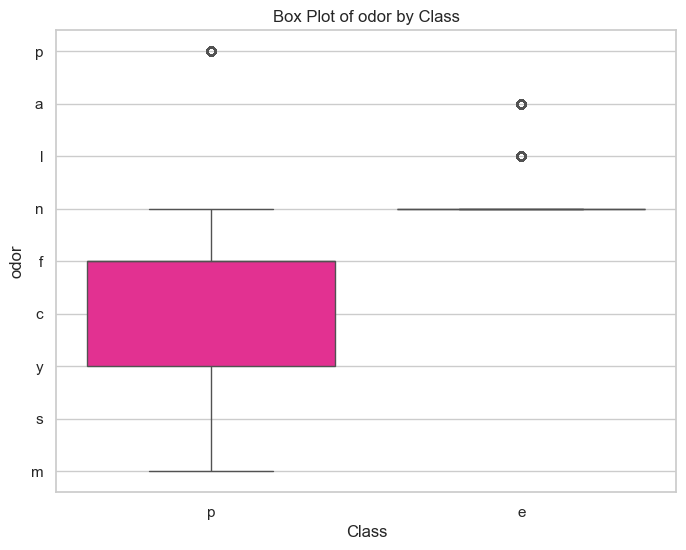

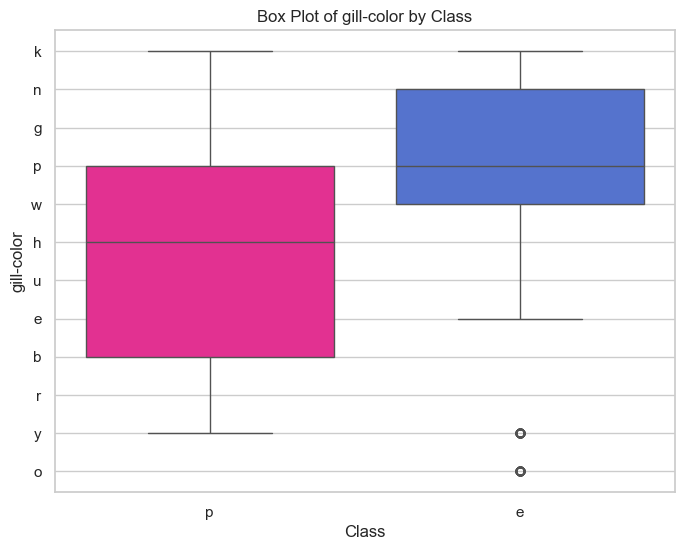

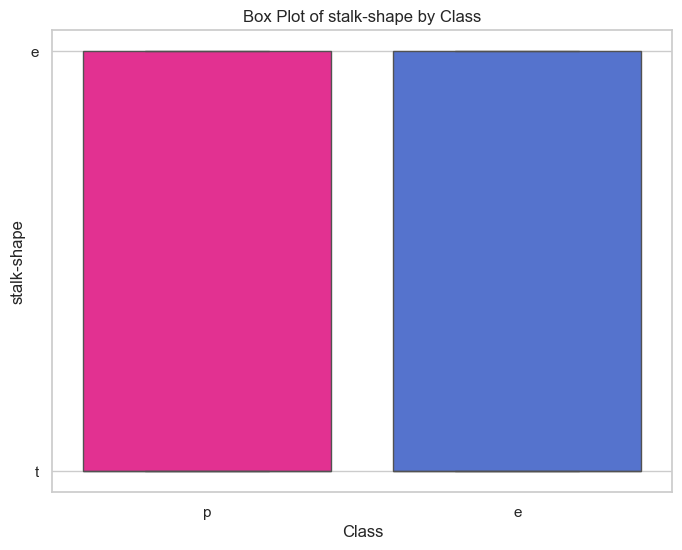

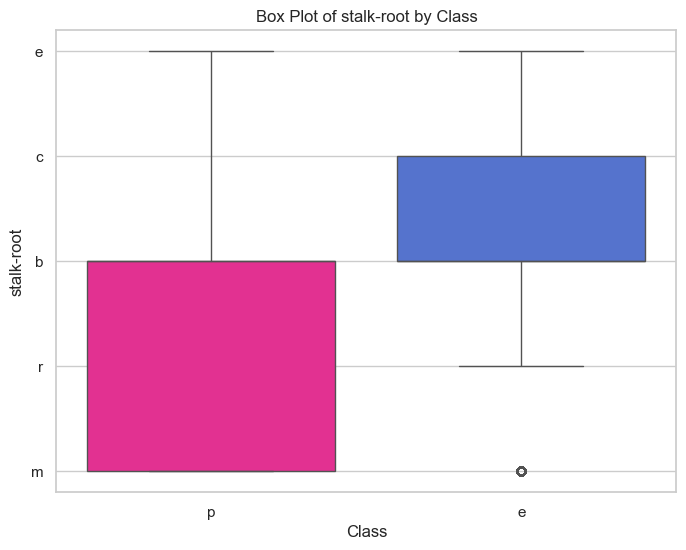

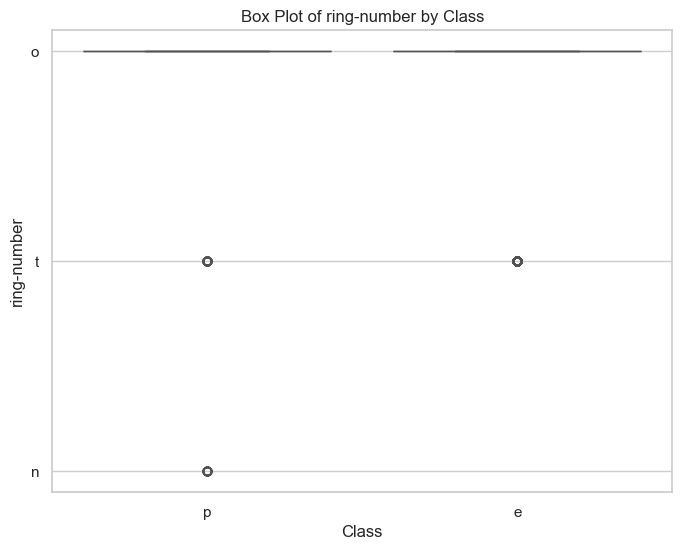

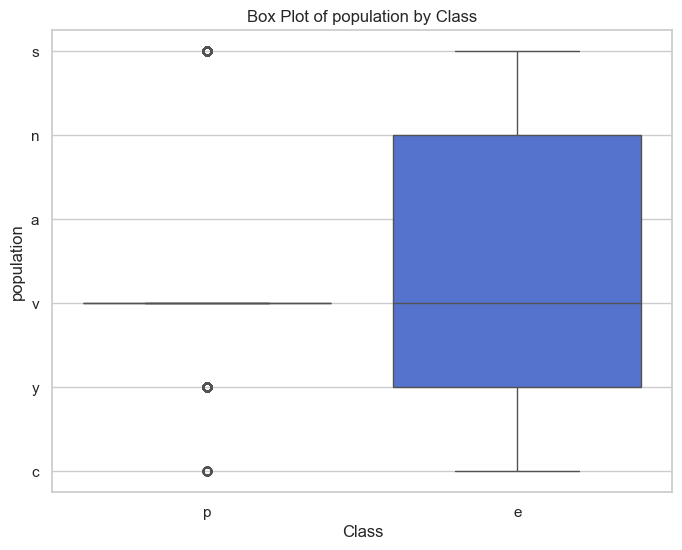

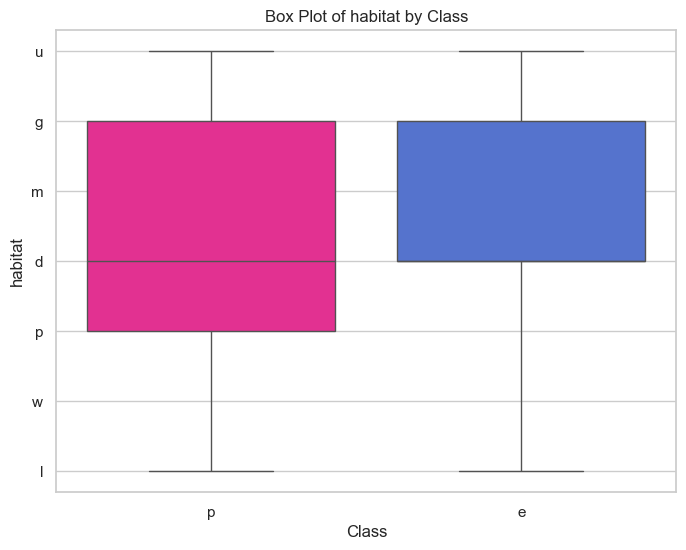

In [2494]:
box_plot_feature_vs_class(features=selected_columns_for_eda)

In [2495]:
def handle_non_standard_values(value: str, standard_values: list):
    if value not in standard_values:
        return 'Others'
    return value

In [2513]:
data['cap-shape'].value_counts()

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

In [2514]:
data['cap-shape'] = data['cap-shape'].apply(lambda x: handle_non_standard_values(x, ['x', 'f', 'k']))

In [2515]:
data['cap-shape'].value_counts()

cap-shape
x         3656
f         3152
k          828
Others     488
Name: count, dtype: int64

In [2516]:
data['cap-surface'].value_counts()

cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

In [2517]:
data['cap-surface'] = data['cap-surface'].apply(lambda x: handle_non_standard_values(x, ['y', 's']))

In [2518]:
data['cap-surface'].value_counts()

cap-surface
y         3244
s         2556
Others    2324
Name: count, dtype: int64

In [2519]:
data['cap-color'].value_counts()

cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

In [2520]:
data['cap-color'] = data['cap-color'].apply(lambda x: handle_non_standard_values(x, ['n', 'g', 'e', 'y', 'w']))

In [2521]:
data['cap-color'].value_counts()

cap-color
n         2284
g         1840
e         1500
y         1072
w         1040
Others     388
Name: count, dtype: int64

In [2525]:
data['odor'].value_counts()

odor
n         3528
f         2160
Others    1284
y          576
s          576
Name: count, dtype: int64

In [2526]:
data['odor'] = data['odor'].apply(lambda x: handle_non_standard_values(x, ['n','f','y','s']))

In [2527]:
data['gill-color'].value_counts()

gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64

In [2528]:
data['gill-color'] = data['gill-color'].apply(lambda x: handle_non_standard_values(x, ['b','p','w','n','g','h','u','k']))

In [2529]:
data['gill-color'].value_counts()

gill-color
b         1728
p         1492
w         1202
n         1048
g          752
h          732
u          492
k          408
Others     270
Name: count, dtype: int64

In [2530]:
data['spore-print-color'].value_counts()

spore-print-color
w    2388
n    1968
k    1872
h    1632
r      72
u      48
o      48
y      48
b      48
Name: count, dtype: int64

In [2531]:
data['spore-print-color'] = data['spore-print-color'].apply(lambda x: handle_non_standard_values(x, ['w','n','k','h']))

In [2532]:
data['spore-print-color'].value_counts()

spore-print-color
w         2388
n         1968
k         1872
h         1632
Others     264
Name: count, dtype: int64

In [2533]:
data['stalk-color-above-ring'].value_counts()

stalk-color-above-ring
w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: count, dtype: int64

In [2534]:
data['stalk-color-above-ring'] = data['stalk-color-above-ring'].apply(lambda x: handle_non_standard_values(x, ['w','p','g','n', 'b']))

In [2535]:
data['stalk-color-above-ring'].value_counts()

stalk-color-above-ring
w         4464
p         1872
g          576
n          448
b          432
Others     332
Name: count, dtype: int64

In [2536]:
data['stalk-color-below-ring'].value_counts()

stalk-color-below-ring
w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: count, dtype: int64

In [2537]:
data['stalk-color-below-ring'] = data['stalk-color-below-ring'].apply(lambda x: handle_non_standard_values(x, ['w','p','g','n', 'b']))

In [2538]:
data['stalk-color-below-ring'].value_counts()

stalk-color-below-ring
w         4384
p         1872
g          576
n          512
b          432
Others     348
Name: count, dtype: int64

In [2539]:
data.drop(columns= ['gill-attachment', 'gill-spacing', 'veil-type',], inplace= True)

In [2541]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [2542]:
encoder = LabelEncoder()

In [2543]:
encoder.fit(data['bruises'])
encoder.classes_ = np.array(['f', 't'])
data['bruises'] = encoder.transform(data['bruises'])

In [2544]:
data['bruises']

0       1
1       1
2       1
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: bruises, Length: 8124, dtype: int32

In [2545]:
data['ring-number']

0       o
1       o
2       o
3       o
4       o
       ..
8119    o
8120    o
8121    o
8122    o
8123    o
Name: ring-number, Length: 8124, dtype: object

In [2546]:
encoder.fit(data['ring-number'])
encoder.classes_ = np.array(['n', 'o', 't'])
data['ring-number'] = encoder.transform(data['ring-number'])

In [2547]:
data['ring-number']

0       1
1       1
2       1
3       1
4       1
       ..
8119    1
8120    1
8121    1
8122    1
8123    1
Name: ring-number, Length: 8124, dtype: int32

In [2548]:
encoder.fit(data['class'])
encoder.classes_ = np.array(['p', 'e'])
data['class'] = encoder.transform(data['class'])

In [2549]:
data['class']

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: class, Length: 8124, dtype: int32

In [2550]:
category_columns = list(data.select_dtypes(include = ['object']).columns)

In [2551]:
category_columns

['cap-shape',
 'cap-surface',
 'cap-color',
 'odor',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [2552]:
data = pd.get_dummies(data, columns=category_columns, dtype=int)

In [2553]:
data.dtypes

class               int32
bruises             int32
ring-number         int32
cap-shape_Others    int32
cap-shape_f         int32
                    ...  
habitat_l           int32
habitat_m           int32
habitat_p           int32
habitat_u           int32
habitat_w           int32
Length: 86, dtype: object

In [2554]:
X = data.drop('class',axis=1)
y = data['class']

In [2555]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   bruises                        8124 non-null   int32
 1   ring-number                    8124 non-null   int32
 2   cap-shape_Others               8124 non-null   int32
 3   cap-shape_f                    8124 non-null   int32
 4   cap-shape_k                    8124 non-null   int32
 5   cap-shape_x                    8124 non-null   int32
 6   cap-surface_Others             8124 non-null   int32
 7   cap-surface_s                  8124 non-null   int32
 8   cap-surface_y                  8124 non-null   int32
 9   cap-color_Others               8124 non-null   int32
 10  cap-color_e                    8124 non-null   int32
 11  cap-color_g                    8124 non-null   int32
 12  cap-color_n                    8124 non-null   int32
 13  cap-color_w       

In [2556]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [2557]:
X.shape ,X_train.shape, X_test.shape

((8124, 85), (5686, 85), (2438, 85))

In [2558]:
y.shape, y_train.shape, y_test.shape

((8124,), (5686,), (2438,))

In [2559]:
train_accuracy_baseline = y_train.value_counts(normalize= True).max()

In [2560]:
train_accuracy_baseline

0.5179387970453746

In [2561]:
test_accuracy_baseline = y_test.value_counts(normalize= True).max()

In [2562]:
test_accuracy_baseline

0.5180475799835931

In [2563]:
baseline_log_reg = LogisticRegression()

In [2564]:
baseline_log_reg.fit(X_train, y_train)

LogisticRegression()

In [2565]:
train_pred_log_reg = baseline_log_reg.predict(X_train)
test_pred_log_reg = baseline_log_reg.predict(X_test)

In [2566]:
baseline_log_reg.score(X_test, y_test)

0.9995898277276456

In [2567]:
train_accuracy_log_reg = accuracy_score(y_train, train_pred_log_reg)

In [2568]:
train_accuracy_log_reg

0.9994723883221949

In [2569]:
test_accuracy_log_reg = accuracy_score(y_test, test_pred_log_reg)

In [2570]:
test_accuracy_log_reg

0.9995898277276456

In [2571]:
cm_baseline_train = confusion_matrix(y_train, train_pred_log_reg)

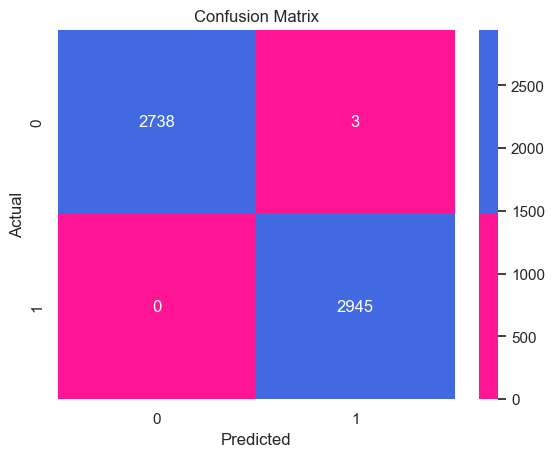

In [2572]:
heatmap_train = sns.heatmap(cm_baseline_train, annot=True, cmap=sns.color_palette(['#FF1493', '#4169E1']), fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# figure = heatmap_train.get_figure()
# figure.savefig(f'cm_baseline_train.png')
plt.show()

In [2573]:
cm_baseline_test = confusion_matrix(y_test, test_pred_log_reg)

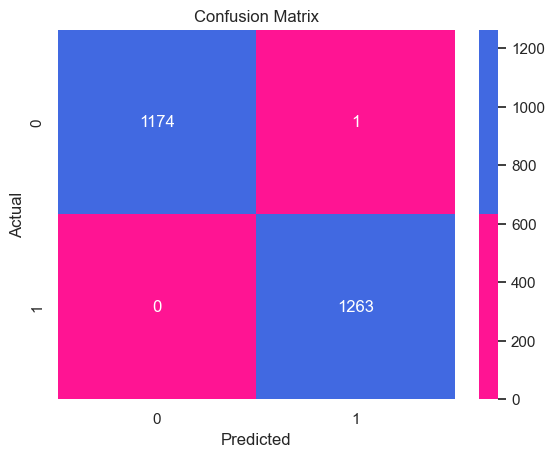

In [2574]:
heatmap_test = sns.heatmap(cm_baseline_test, annot=True, cmap=sns.color_palette(['#FF1493', '#4169E1']), fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# figure = heatmap_test.get_figure()
# figure.savefig(f'confusion_matrix_test.png')
plt.show()

In [2575]:
train_baseline_report = classification_report(y_train, train_pred_log_reg, output_dict=True)

In [2576]:
df_train_report = pd.DataFrame(train_baseline_report).transpose()

In [2577]:
df_train_report

,precision,recall,f1-score,support
0,1.000000,0.998906,0.999452,2741.000000
1,0.998982,1.000000,0.999491,2945.000000
accuracy,0.999472,0.999472,0.999472,0.999472
macro avg,0.999491,0.999453,0.999472,5686.000000
weighted avg,0.999473,0.999472,0.999472,5686.000000


In [2578]:
test_baseline_report = classification_report(y_test, test_pred_log_reg, output_dict=True)

In [2579]:
df_test_report = pd.DataFrame(test_baseline_report).transpose()

In [2580]:
df_test_report

,precision,recall,f1-score,support
0,1.000000,0.999149,0.999574,1175.00000
1,0.999209,1.000000,0.999604,1263.00000
accuracy,0.999590,0.999590,0.999590,0.99959
macro avg,0.999604,0.999574,0.999589,2438.00000
weighted avg,0.999590,0.999590,0.999590,2438.00000


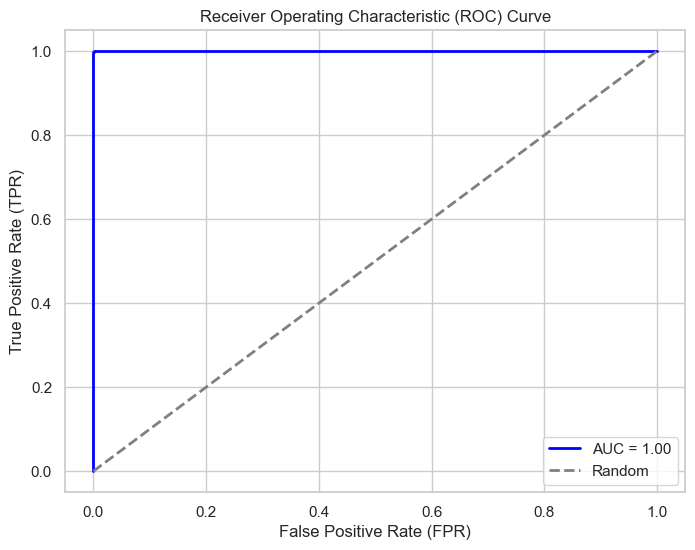

In [2581]:
y_scores = baseline_log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
# plt.savefig(f'roc_curve.png')
plt.show()

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [2582]:
grid_search = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [2583]:
best_C = grid_search.best_params_['C']

In [2584]:
best_C

10

In [2585]:
optimized_log_reg = LogisticRegression(C=best_C, max_iter=200)

In [2586]:
optimized_log_reg.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=200)

In [2588]:
train_pred_optimized_log_reg = optimized_log_reg.predict(X_train)
test_pred_optimized_log_reg = optimized_log_reg.predict(X_test)

In [2589]:
optimized_log_reg.score(X_test, y_test)

1.0

In [2590]:
train_accuracy_optimized_log_reg = accuracy_score(y_train, train_pred_optimized_log_reg)

In [2591]:
train_accuracy_optimized_log_reg

1.0

In [2592]:
test_accuracy_optimized_log_reg = accuracy_score(y_test, test_pred_optimized_log_reg)

In [2593]:
test_accuracy_optimized_log_reg

1.0

In [2594]:
cm_optimized_train = confusion_matrix(y_train, train_pred_optimized_log_reg)

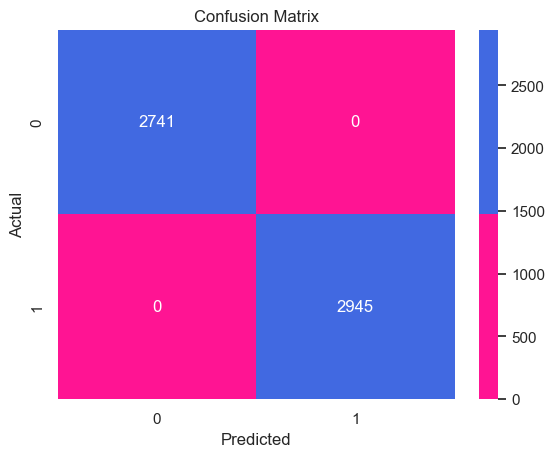

In [2596]:
sns.heatmap(cm_optimized_train, annot=True, cmap=sns.color_palette(['#FF1493', '#4169E1']), fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# figure = heatmap_train.get_figure()
# figure.savefig(f'cm_optimized_train.png')
plt.show()

In [2597]:
cm_optimized_test = confusion_matrix(y_test, test_pred_optimized_log_reg)

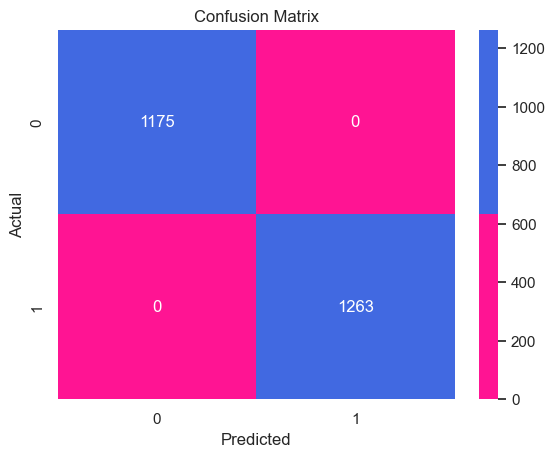

In [2598]:
sns.heatmap(cm_optimized_test, annot=True, cmap=sns.color_palette(['#FF1493', '#4169E1']), fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# figure = heatmap_train.get_figure()
# figure.savefig(f'cm_optimized_test.png')
plt.show()

In [2604]:
train_optimized_report = classification_report(y_train, train_pred_optimized_log_reg, output_dict=True)

In [2605]:
df_train_report_optimized = pd.DataFrame(train_optimized_report).transpose()

In [2606]:
df_train_report_optimized

,precision,recall,f1-score,support
0,1.0,1.0,1.0,2741.0
1,1.0,1.0,1.0,2945.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,5686.0
weighted avg,1.0,1.0,1.0,5686.0


In [2607]:
test_optimized_report = classification_report(y_test, test_pred_optimized_log_reg, output_dict=True)

In [2608]:
df_test_report_optimized = pd.DataFrame(test_optimized_report).transpose()

In [2609]:
df_test_report_optimized

,precision,recall,f1-score,support
0,1.0,1.0,1.0,1175.0
1,1.0,1.0,1.0,1263.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,2438.0
weighted avg,1.0,1.0,1.0,2438.0


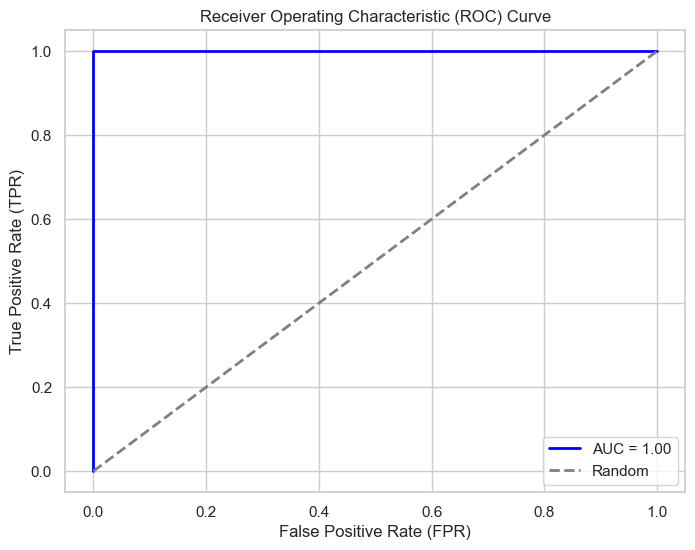

In [2610]:
y_scores = optimized_log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
# plt.savefig(f'roc_curve_optimized.png')
plt.show()